In [1]:
### Importing libraries

import numpy as np
#import matplotlib

import matplotlib.pyplot as plt
%matplotlib notebook

import matplotlib.path as mpltPath

import matplotlib.patches as patches

#plt.close('all')

import scipy

import scipy.spatial

from scipy.interpolate import interp1d

#import math

#import pydicom as pyd

#import glob

import pickle

#import skimage

from skimage.util import img_as_float

from skimage.util import img_as_float

from skimage.metrics import structural_similarity as ssim


import scipy

import scipy.spatial

import time

#### Reference Numbers

<IPython.core.display.Javascript object>


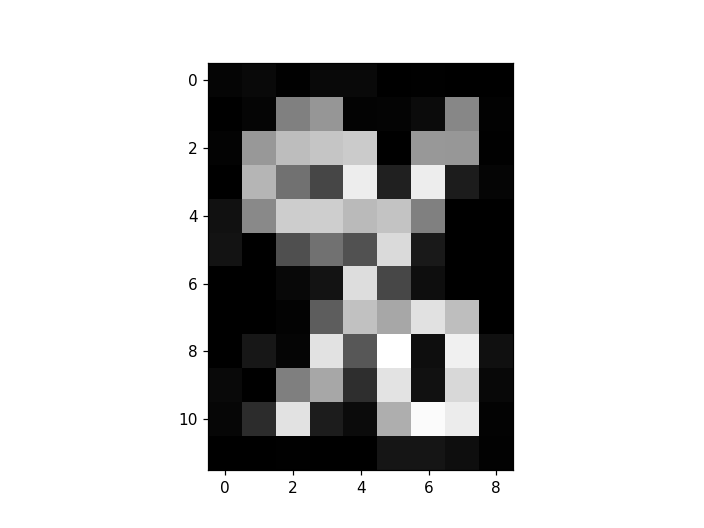

In [2]:
### Reference numbers

refs = [0,0,0,0,0,0,0,0,0,0,0,0]


# for 0

cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 82 )

ref_0 = cine_image[4:16, 156:164][:,:,0]

refs[0] = ref_0


# for 1

cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 23 )

ref_1 = cine_image[4:16, 156:164][:,:,0]

refs[1] = ref_1


# for 2


cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 424 )

ref_2 = cine_image[4:16, 156:164][:,:,0]

refs[2] = ref_2


# for 3



cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 1531 )

ref_3 = cine_image[4:16, 156:164][:,:,0]

refs[3] = ref_3



#for 4


cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 1060 )

ref_4 = cine_image[4:16, 156:164][:,:,0]

refs[4] = ref_4


# for 5


cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 18 )

ref_5 = cine_image[4:16, 149:157][:,:,0]

refs[5] = ref_5




# for 6

cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 23 )

ref_6 = cine_image[4:16, 149:157][:,:,0]

refs[6] = ref_6


# for 7

cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 143 )

ref_7 = cine_image[4:16, 156:164][:,:,0]

refs[7] = ref_7


# for 8



cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 19 )

ref_8 = cine_image[4:16, 156:164][:,:,0]

refs[8] = ref_8



# for 9



cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 18 )

ref_9 = cine_image[4:16, 156:164][:,:,0]

refs[9] = ref_9





cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 333 )

ref_point = cine_image[18:30 , 155:163 , 0]

refs[10] = ref_point



cine_image = plt.imread('Cine frames/' + 'pat_9_frac_1.ogv' + '/frame-%04d.png' % 2632 )

ref_percent = cine_image[18:30 , 183:192 ,0]

refs[11] = ref_percent




plt.figure()

plt.imshow(refs[11], cmap = 'gray')

#### AUTO below

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n



In [4]:
with open('Cine Pickles/patient_numbers.pickle', 'rb') as handle:
    pat_nums = pickle.load(handle)
    
with open('Cine Pickles/pat_num_2_frac_nums.pickle', 'rb') as handle:
    pat_num_2_frac_nums = pickle.load(handle)

In [5]:
for pat_num in [1,6]:#pat_nums:
    
    for frac_num in range(1, pat_num_2_frac_nums[pat_num] + 1):
        
        print( '------>' + str(pat_num) + ' , ' + str(frac_num))
        
        cine_video_name = 'pat_' + str(pat_num) + '_frac_' + str(frac_num) + '.ogv'
        
        






        with open('Cine Pickles/' + cine_video_name + '/cine_res.pickle', 'rb') as handle:
            cine_res = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/cine_fps.pickle', 'rb') as handle:
            cine_fps = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/MR_res.pickle', 'rb') as handle:
            MR_res = pickle.load(handle)

        with open('Cine Pickles/' + cine_video_name + '/MR_pixel.pickle', 'rb') as handle:
            MR_pixel = pickle.load(handle)


        with open('Cine Pickles/' + cine_video_name + '/number_of_minutes.pickle', 'rb') as handle:
            number_of_minutes = pickle.load(handle)


        total_no_of_frames = 0


        for minute_number in np.arange(1, number_of_minutes + 2, 2 , dtype = 'int'):

            with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) +'/no_of_frames.pickle', 'rb') as handle:
                no_of_frames = pickle.load(handle)

            total_no_of_frames += no_of_frames

        frame_nums = np.arange(0, total_no_of_frames, 1)  


        with open('Cine Pickles/' + cine_video_name + '/frame_nums.pickle', 'wb') as handle:
            pickle.dump(frame_nums, handle, protocol=pickle.HIGHEST_PROTOCOL)




        ###=========================================================================================



        Number_of_yellows = []

        frames = []

        frames_yellow_pixels_y = []

        frames_yellow_pixels_x = []

        frames_yellow_pixels_coords = []




        ###=========================================================================================

        ### Finding yellow contour for each of first 100 frames, take one with most yellow pixels - most likely to be correct



        for frame_index in np.arange(0, 20, 1):

            #print(frame_index)



            frames.append(frame_index)

            cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_index )




            cine_image = img_as_float(cine_image)

            cine_original = cine_image



            #############  Add border Mask

            border_width = 64

            mask = np.zeros( cine_image.shape[0:2])


            for i in range(0,cine_image.shape[0]):

                for j in range(0,cine_image.shape[1]):

                    if (i > border_width) & (i < (cine_image.shape[0]-border_width)) & (j > border_width) & (j < (cine_image.shape[1]-border_width)):

                        mask[i,j] = True

                    else:

                        mask[i,j] = False




            for i in [0,1,2]:


                cine_image[:,:,i] = cine_image[:,:,i]*mask




        #     plt.figure(figsize = (8,8))

        #     plt.imshow(cine_image)



        ############ Search for yellow pixels


            yellow_pixels = np.where(  ( abs(cine_image[:,:,0] - cine_image[:,:,1]) <= 0.2 * cine_image[:,:,0]) & (cine_image[:,:,0] >= 1.5*cine_image[:,:,2]) & (cine_image[:,:,0] >= 0.7))



            yellow_pixels_y =  [ yellow_pixels[0][i] for i in range(0, len(yellow_pixels[0]))] 

            frames_yellow_pixels_y.append( yellow_pixels_y )



            yellow_pixels_x= [ yellow_pixels[1][i] for i in range(0, len(yellow_pixels[1]))]

            frames_yellow_pixels_x.append( yellow_pixels_x )


            yellow_pixels_coords = [ [ yellow_pixels[1][i] , yellow_pixels[0][i]] for i in range(0, len(yellow_pixels[1]))]


            frames_yellow_pixels_coords.append( yellow_pixels_coords )





            number_of_yellow = len(yellow_pixels_coords)

            Number_of_yellows.append(number_of_yellow)





        #     x_bar = sum(yellow_pixels_x)/len(yellow_pixels_x)

        #     y_bar = sum(yellow_pixels_y)/len(yellow_pixels_y)


        #     plt.figure(figsize = (8,8))
        #     plt.scatter(yellow_pixels_x, yellow_pixels_y, marker = 'p', color = 'black')
        #     plt.scatter(yellow_pixels_x[0], yellow_pixels_y[0])
        #     plt.scatter(x_bar, y_bar, color = 'red')

        #     #plt.xticks( ticks = np.arange(220,260,1))
        #     plt.grid('on')

        #     plt.gca().invert_yaxis()



        #=====================================================================================


        number_yellow_2_frame = dict( zip(Number_of_yellows, frames))

        frame_2_yellow_pixels_x = dict( zip(frames , frames_yellow_pixels_x ))

        frame_2_yellow_pixels_y = dict( zip(frames , frames_yellow_pixels_y ))

        frame_2_yellow_pixels_coords = dict( zip(frames , frames_yellow_pixels_coords ))

        Number_of_yellows_max = np.max(Number_of_yellows)


        Max_yellow_frame = number_yellow_2_frame[Number_of_yellows_max]

        print('Max yellow frame: ' + str(Max_yellow_frame) )

        yellow_pixels_x = frame_2_yellow_pixels_x[Max_yellow_frame]

        yellow_pixels_y = frame_2_yellow_pixels_y[Max_yellow_frame]

        yellow_pixels_coords = frame_2_yellow_pixels_coords[Max_yellow_frame]




        cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % Max_yellow_frame )


        #==================================================================================================




        #==================================================================================================



        ## Trying to implement nearest neighbour KD-tree

        #plt.close('all')



        coords = yellow_pixels_coords

        #print(len(coords))


        original_point = coords[0]

        point = original_point

        #print(start_point)

        ordered_points = []

        ordered_points.append(point)


        for i in range(0 , len(coords) - 1 ):  # length - 1 since dealing with pairs of points


            if i > 0.5*len(yellow_pixels_coords):

                coords.append(original_point)  #if points have been missed, this basically stops them being counted at the end



            coords_array = np.array(coords)

            #print(coords_array.shape)

            point_indx = np.where( (coords_array[:,0] == point[0]) & (coords_array[:,1] == point[1] ))

            point_indx = list(point_indx)[0][0]


            kdt = scipy.spatial.KDTree(coords_array, leafsize=10, compact_nodes=True, copy_data=False, balanced_tree=True, boxsize=None)



            closest_points = kdt.query(point, 2)



            closest_point = coords[ closest_points[1][1]]


            coords.pop(point_indx)

            #print('s' + str(point))

            #print(len(coords))


            point = closest_point

            ordered_points.append(point)

            #print('c' + str(point))




        ordered_points_array = np.array(ordered_points)






        #==================================================================================================




        ordered_x = ordered_points_array[:,0] 

        ordered_y = ordered_points_array[:,1] 

        # # plt.figure(figsize = (8,8))

        # # plt.imshow(cine_image)

        # # plt.plot(ordered_x, ordered_y, marker = 'p', 
        # #          color = 'white')



        # plt.scatter(ordered_x[0], ordered_y[0], color = 'lightblue')






        for i in range(0,2):

            mov_avg_x = moving_average(ordered_x)

            mov_avg_y = moving_average(ordered_y)


        mov_avg_points = [ [mov_avg_x[i], mov_avg_y[i]]  for i in range(0, len(mov_avg_x))]    

        mov_avg_points = mov_avg_points + [mov_avg_points[0]]


        #mov_avg_points = [1/2*(ordered_points[0] + ordered_points[-1])] + mov_avg_points #+ #[ordered_points[0]]

        #mov_avg_points = [ [0.5* ( mov_avg_x[0] + mov_avg_y[0] ), 0.5* ( mov_avg_x[-1] + mov_avg_y[-1] ) ]] + [ [mov_avg_x[i], mov_avg_y[i]]  for i in range(0, len(mov_avg_x))] + [ordered_points[0]]

        #mov_avg_points.append( ordered_points_array[0] )

        #mov_avg_points.append()

        mov_avg_array = np.array(mov_avg_points)



        #==================================================================================================



        # plt.figure(figsize = (8,8))

        # plt.imshow(cine_image)

        # plt.plot(mov_avg_array[:,0], mov_avg_array[:,1], marker = 'p', color = 'white')



        # plt.scatter(yellow_pixels[1], yellow_pixels[0], color = 'lightblue')

        # plt.scatter(ordered_x[0], ordered_y[0])

        # plt.scatter(ordered_x[1], ordered_y[1])

        # plt.grid('on')

        # #plt.gca().invert_yaxis()



        #==================================================================================================




        #from scipy.interpolate import interp1d

        #x_0, y_0 = ordered_points_array.T

        x_av, y_av = mov_avg_array.T

        #x, y = ordered_points_array[0::2].T

        i = np.arange(len(mov_avg_array[0::1]))

        # 5x the original number of points
        interp_i = np.linspace(0, i.max(), 4 * i.max())

        xi = interp1d(i, x_av, kind='cubic')(interp_i)
        yi = interp1d(i, y_av, kind='cubic')(interp_i)

        # fig  = plt.figure(figsize = (10,10))

        # ax = fig.add_subplot()

        # ax.imshow(cine_original)
        # ax.plot(xi, yi, color = 'white', marker = '.')
        # #ax.plot(x_0, y_0, 'ko')
        # plt.show()




        #==================================================================================================





        #import matplotlib.path as mpltPath

        interpolated_contour_points = [ [xi[j] , yi[j]] for j in range(0, len(xi)) ]

        path = mpltPath.Path(interpolated_contour_points)



        # import matplotlib.patches as patches

        # fig = plt.figure(figsize = (10,10))

        # ax = fig.add_subplot(111)


        # ax.set_xlim(0, 512)
        # ax.set_ylim(0,512)


        # ax.invert_yaxis()

        # plt.axis('on')

        # ax.imshow( cine_image)

        # patch = patches.PathPatch(path, facecolor='None', edgecolor = 'yellow', lw=2)

        # ax.add_patch(patch)





        #==================================================================================================




        ### Create a pixel mask of points in his contour

        contour_mask1 = np.zeros(cine_original[:,:,0].shape)


        #############

        contour_mask2 = np.zeros(cine_original[:,:,0].shape)

        ########

        #print(cine_original.shape)


        cont_x_min = int(np.floor(min(xi)))

        #print(cont_x_min)

        cont_x_max = int(np.ceil(max(xi)))

        cont_y_min = int(np.floor(min(yi)))

        cont_y_max = int(np.ceil(max(yi)))


        for x in range(cont_x_min - 1 , cont_x_max+1):

            for y in range(cont_y_min - 1 , cont_y_max+1):

                point = [[x,y]]

                inside_point1 = path.contains_points(point, radius = 1)

                inside_point2 = path.contains_points(point, radius = -1)

                contour_mask1[y,x] = 1*inside_point1[0]

                contour_mask2[y,x] = 1*inside_point2[0]


        if np.sum(contour_mask1) > np.sum(contour_mask2):

            contour_mask = contour_mask1

        else: 

            contour_mask = contour_mask2


        #print(contour_mask.shape)


        boundary_array = contour_mask



        boundary_pixels = np.where( contour_mask == 1)        


        boundary_pixel_coordinates =  np.array([   [ boundary_pixels[1][i]  ,  boundary_pixels[0][i] ] for i in range(0 , len(boundary_pixels[0]))  ] )


        Inside_Boundary_Pixel_Coordinates = boundary_pixel_coordinates


        with open('Cine Pickles/' + cine_video_name + '/Inside_Boundary_Pixel_Coordinates.pickle', 'wb') as handle:

            pickle.dump(Inside_Boundary_Pixel_Coordinates, handle, protocol=pickle.HIGHEST_PROTOCOL)



        #==================================================================================================





#         fig = plt.figure()

#         ax = fig.add_subplot(111)


#         ax.set_xlim(0, 512)
#         ax.set_ylim(0,512)



#         plt.imshow(contour_mask , cmap = 'gray')#*cine_original[:,:,0]
#                    #, )#cmap = 'jet')

#         plt.gca().invert_yaxis()

#         patch = patches.PathPatch(path, facecolor='None', edgecolor = 'yellow', lw=2)

#         ax.add_patch(patch)

#         #plt.gca().invert_yaxis()

#         plt.axis('on')
        
        
        
        
        
#         fig1 = plt.figure()
        
#         ax1 = fig1.add_subplot(121)
        
#         ax1.imshow(cine_image[:,:,0]*(1-contour_mask) , cmap = 'gray')
        
#         ax2 = fig1.add_subplot(122)
        
#         ax2.imshow(cine_image)


##################################################################===============================



        #Calculating fraction outside




        All_Frames_Target_Pixel_Coordinates = []


        for minute_number  in np.arange(1, number_of_minutes +2 , 2 , dtype = 'int'):

            #print(minute_number)


            with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) +'/Frames_Target_Pixel_Coordinates.pickle', 'rb') as handle:
                Frames_Target_Pixel_Coordinates = pickle.load(handle)


            for frame in Frames_Target_Pixel_Coordinates:


                All_Frames_Target_Pixel_Coordinates.append(frame)






        ##============================================



        Areas = []

        Fracs_outside_calculated = []


        for frame_num in frame_nums:






            target_array = np.zeros(cine_image.shape[0:2])


            for coordinate in All_Frames_Target_Pixel_Coordinates[frame_num]:

                x = coordinate[0]

                y = coordinate[1]

                target_array[y,x] = 1



            outside_pixels = np.where(  (2*target_array - contour_mask) == 2)

            area_outside = len(outside_pixels[0])

            area = len(All_Frames_Target_Pixel_Coordinates[frame_num])

            frac_outside = 100*area_outside/area


            Fracs_outside_calculated.append(frac_outside)

            Areas.append(area)





        ###############################################################################





        #Reading fraction outside






        Fracs_outside_from_image = []


        for frame_num in frame_nums:

            cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_num )



            ### Percent sign depending on number of digits


            ## 4 digit case

            percent_4 = cine_image[18:30 , 183:192 ,0]


            ## 3 digit case


            percent_3 = cine_image[18:30 , 176:185 ,0]


            ################# Test which one matches reference percent best


            ssim_4 = ssim(percent_4 , refs[11])

            ssim_3 = ssim(percent_3 , refs[11])


            if ssim_4 > ssim_3:

                number_of_digits = 4

            else:

                number_of_digits = 3


            #print(number_of_digits)




            ################# Case of three digits


            if number_of_digits == 3:


                first_digit_img = cine_image[18:30 , 149:157,0]


                first_digit_tests = []


                for number in range(0,10):

                    ref_num = refs[number]

                    first_digit_tests.append( ssim( first_digit_img, (ref_num) ))


                first_digit =  np.where(  np.array(first_digit_tests) ==  max(first_digit_tests) )[0][0]


                fraction_outside = first_digit

                Fracs_outside_from_image.append(fraction_outside)

            ############################# Case of 4 digits


            if number_of_digits == 4:

                first_digit_img = cine_image[18:30 , 149:157,0]


                first_digit_tests = []


                for number in range(0,10):

                    ref_num = refs[number]

                    first_digit_tests.append( ssim( first_digit_img, (ref_num) ))


                first_digit =  np.where(  np.array(first_digit_tests) ==  max(first_digit_tests) )[0][0]



                second_digit_img = cine_image[18:30 , 156:164,0]


            #     plt.figure()

            #     plt.imshow(second_digit_img)



                second_digit_tests = []


                for number in range(0,10):

                    ref_num = refs[number]

                    second_digit_tests.append( ssim( second_digit_img, (ref_num) ))


                second_digit =  np.where(  np.array(second_digit_tests) ==  max(second_digit_tests) )[0][0]


                fraction_outside = 10*first_digit + second_digit

                Fracs_outside_from_image.append(fraction_outside)








        ##################====================================


        #Agreements


        #Haven't coded for 100's column digit so just do it mod 100

        Fracs_outside_differences =  np.array(Fracs_outside_from_image)%100 - np.array(Fracs_outside_calculated)%100 


        Fracs_outside_abs_differences = abs(Fracs_outside_differences)
        
        
        


        


        errors = list( np.where( ( Fracs_outside_abs_differences  > 10 ) )[0] )



        with open('Cine Pickles/' + cine_video_name + '/error_frames_from_target_contour_extraction.pickle', 'rb') as handle:
            error_frames = pickle.load(handle)
                          
                          
        
        error_frames = sorted( list(   set( error_frames + errors) ) )
        
        
        
        error_rate = 100*len(error_frames)/len(frame_nums)
        
        
        with open('Cine Pickles/' + cine_video_name + '/error_rate_total.pickle', 'wb') as handle:
            pickle.dump(error_rate, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
        with open('Cine Pickles/' + cine_video_name + '/error_frames_total.pickle', 'wb') as handle:
            pickle.dump(error_frames, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
            
        print('error rate: ' + str(  round(error_rate , 4) ) + ' %' )
        
        
        
        
        
        agreement_non_error_frames = list(Fracs_outside_abs_differences)
        
        offset = 0
        
        for frame in error_frames:
            
            agreement_non_error_frames.pop(frame - offset)
            
            offset += 1
            
            
        agreement_non_error_frames = np.array(agreement_non_error_frames)


            
        agreement_abs_mean = np.mean(agreement_non_error_frames)
        
        agreement_abs_95 = np.percentile(agreement_non_error_frames , 95)
        
        agreement_stats = [agreement_abs_mean, agreement_abs_95]
        
        
        with open('Cine Pickles/' + cine_video_name + '/Fraction_outside_agreement_stats.pickle', 'wb') as handle:
            pickle.dump(agreement_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
            
        print( 'mean agreement -->   ' + str( round(agreement_abs_mean , 3)) + ' %')
        
        print( 'agreement 95 -->  ' + str( round(agreement_abs_95, 3)) + ' %')
        
        

#         plt.figure()

#         plt.grid()

#         plt.scatter(frame_nums , Fracs_outside_differences  , color = 'black' , alpha = 0.05 )

#         plt.scatter( error_frames ,  [ Fracs_outside_differences[error_frame] for error_frame in error_frames  ] , color = 'tab:red')







        print(' ')
        print('sleeping...')
        print(' ')
        
        time.sleep(30)


















------>1 , 1
Max yellow frame: 18
error rate: 2.4557 %
mean agreement -->   1.761 %
agreement 95 -->  7.393 %
 
sleeping...
 
------>1 , 2
Max yellow frame: 2
error rate: 1.8254 %
mean agreement -->   1.764 %
agreement 95 -->  6.314 %
 
sleeping...
 
------>1 , 3
Max yellow frame: 11
error rate: 8.4479 %
mean agreement -->   2.216 %
agreement 95 -->  9.082 %
 
sleeping...
 
------>1 , 4
Max yellow frame: 6
error rate: 0.5762 %
mean agreement -->   0.922 %
agreement 95 -->  4.154 %
 
sleeping...
 
------>1 , 5
Max yellow frame: 6
error rate: 0.7778 %
mean agreement -->   1.255 %
agreement 95 -->  6.69 %
 
sleeping...
 
------>6 , 1
Max yellow frame: 2
error rate: 0.5098 %
mean agreement -->   1.165 %
agreement 95 -->  2.446 %
 
sleeping...
 
------>6 , 2
Max yellow frame: 19
error rate: 0.1722 %
mean agreement -->   0.596 %
agreement 95 -->  1.963 %
 
sleeping...
 
------>6 , 3
Max yellow frame: 19
error rate: 0.1504 %
mean agreement -->   0.648 %
agreement 95 -->  1.985 %
 
sleeping...

In [7]:
print(error_frames)

[7, 58, 59, 63, 609, 1492]


In [33]:
print(error_frames)

[10, 20, 22, 194, 203, 204, 220, 291, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 457, 461, 463, 470, 473, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 1143, 1680, 1681, 1682, 1683, 1685, 1691, 1692, 1693, 1695, 1696, 1697, 1698, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 2209, 2212]


<IPython.core.display.Javascript object>


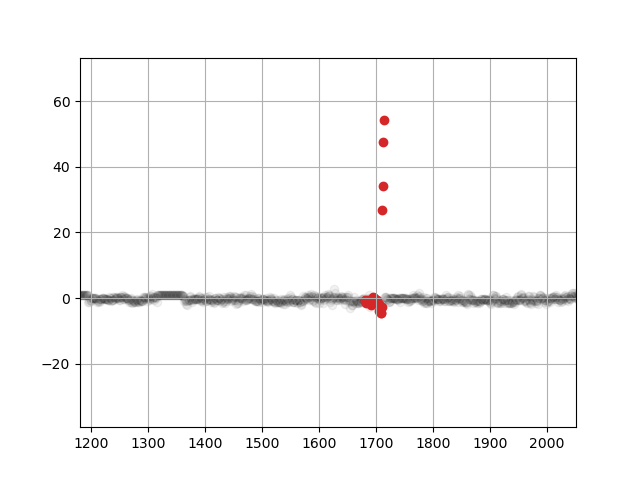

In [34]:

plt.figure()

plt.grid()

plt.scatter(frame_nums , Fracs_outside_differences  , color = 'black' , alpha = 0.05 )

plt.scatter( error_frames ,  [ Fracs_outside_differences[error_frame] for error_frame in error_frames  ] , color = 'tab:red')


<IPython.core.display.Javascript object>


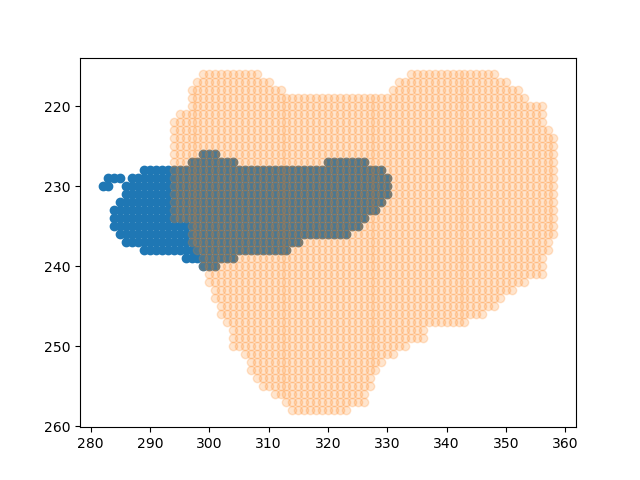

<IPython.core.display.Javascript object>


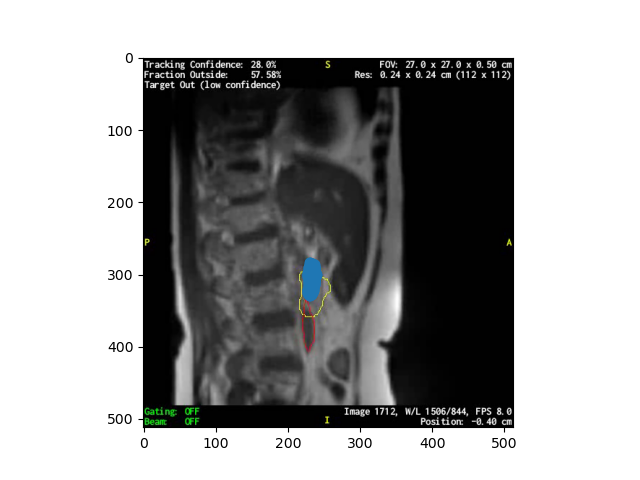

57
22.964509394572026


In [35]:
frame_num = 1712

plt.figure()

plt.scatter(  All_Frames_Target_Pixel_Coordinates[frame_num][:,1] , All_Frames_Target_Pixel_Coordinates[frame_num][:,0])

plt.scatter(  Inside_Boundary_Pixel_Coordinates[:,1] , Inside_Boundary_Pixel_Coordinates[:,0], alpha = 0.2)

plt.gca().invert_yaxis()




cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_num )

plt.figure()

plt.imshow(cine_image)

plt.scatter(  All_Frames_Target_Pixel_Coordinates[frame_num][:,0] , All_Frames_Target_Pixel_Coordinates[frame_num][:,1])



print(Fracs_outside_from_image[frame_num])


print(Fracs_outside_calculated[frame_num])



In [2]:
cine_video_name = 'pat_2_frac_2.ogv'

In [3]:
with open('Cine Pickles/' + cine_video_name + '/cine_res.pickle', 'rb') as handle:
    cine_res = pickle.load(handle)
    
with open('Cine Pickles/' + cine_video_name + '/cine_fps.pickle', 'rb') as handle:
    cine_fps = pickle.load(handle)
    
with open('Cine Pickles/' + cine_video_name + '/MR_res.pickle', 'rb') as handle:
    MR_res = pickle.load(handle)
    
with open('Cine Pickles/' + cine_video_name + '/MR_pixel.pickle', 'rb') as handle:
    MR_pixel = pickle.load(handle)
    
    
with open('Cine Pickles/' + cine_video_name + '/number_of_minutes.pickle', 'rb') as handle:
    number_of_minutes = pickle.load(handle)
    
    
total_no_of_frames = 0


for minute_number in np.arange(1, number_of_minutes + 2, 2 , dtype = 'int'):
    
    with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) +'/no_of_frames.pickle', 'rb') as handle:
        no_of_frames = pickle.load(handle)
        
    total_no_of_frames += no_of_frames
    
frame_nums = np.arange(0, total_no_of_frames, 1)  

    
# with open('Cine Pickles/' + cine_video_name + '/frame_nums.pickle', 'wb') as handle:
#     pickle.dump(frame_nums, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [4]:
Number_of_yellows = []

frames = []

frames_yellow_pixels_y = []

frames_yellow_pixels_x = []

frames_yellow_pixels_coords = []



99


<IPython.core.display.Javascript object>


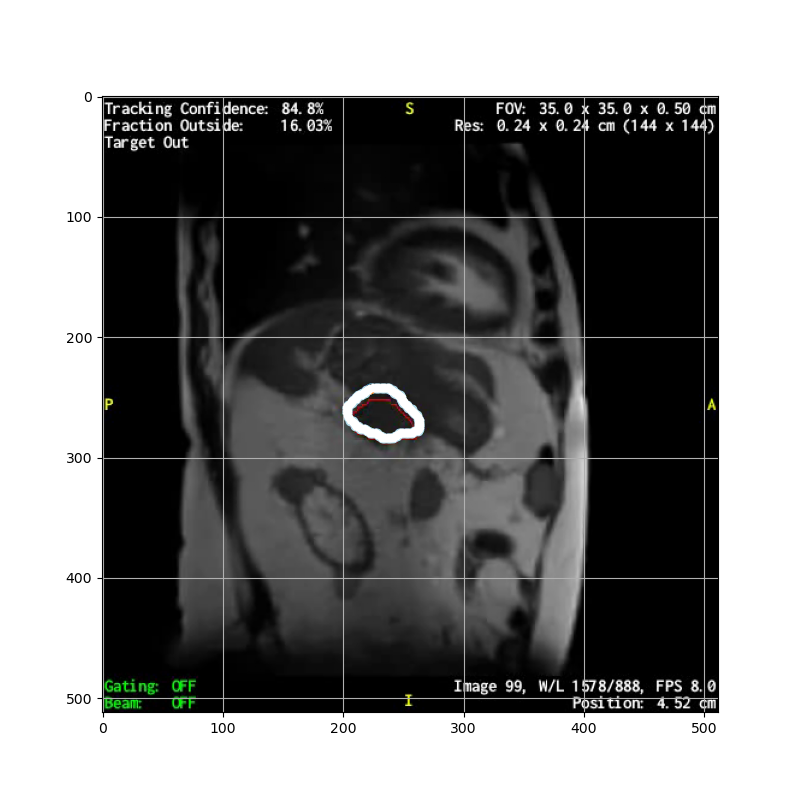

<IPython.core.display.Javascript object>


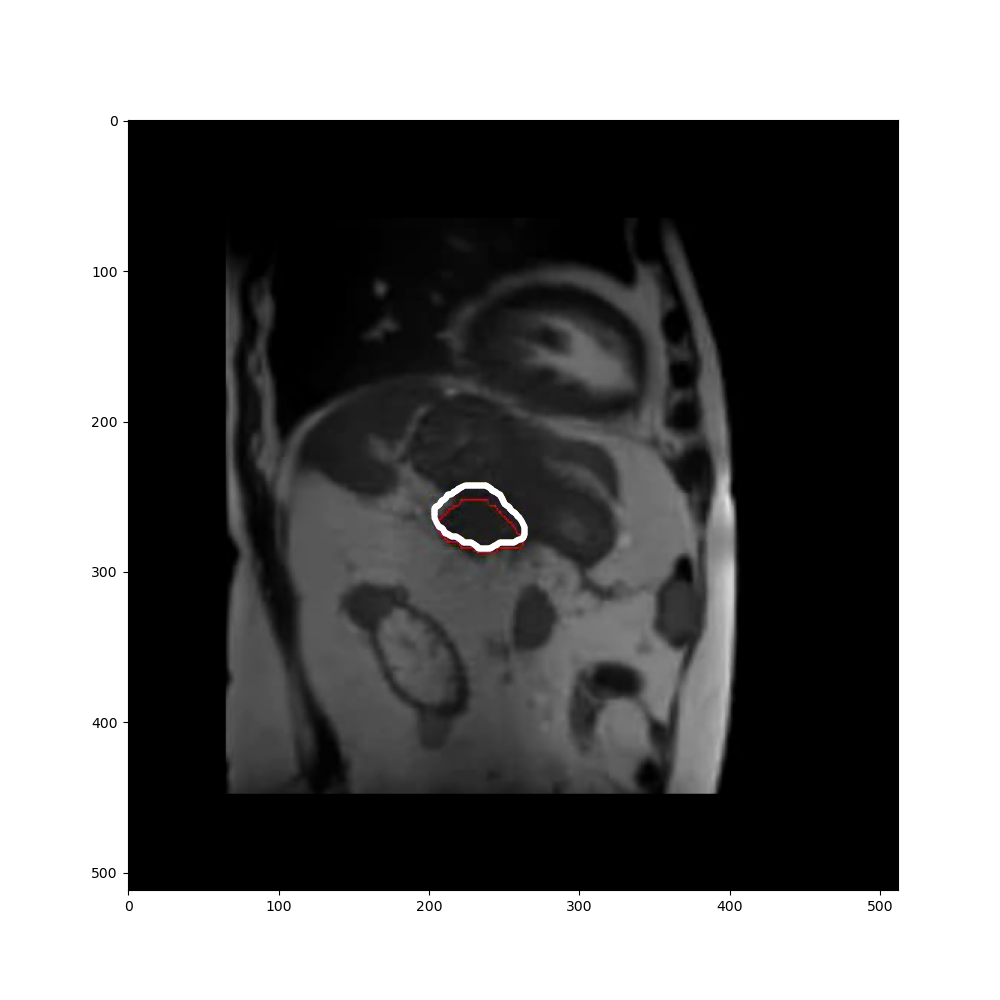

<IPython.core.display.Javascript object>


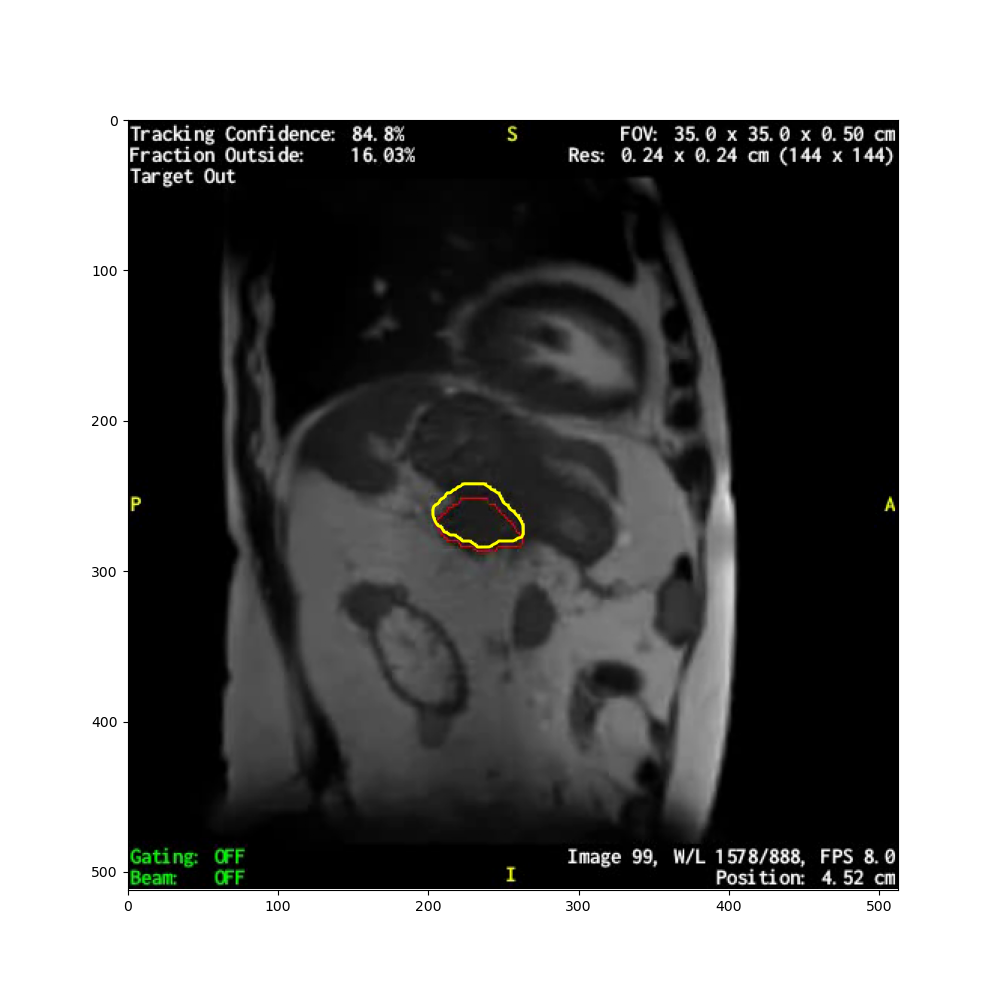

<IPython.core.display.Javascript object>


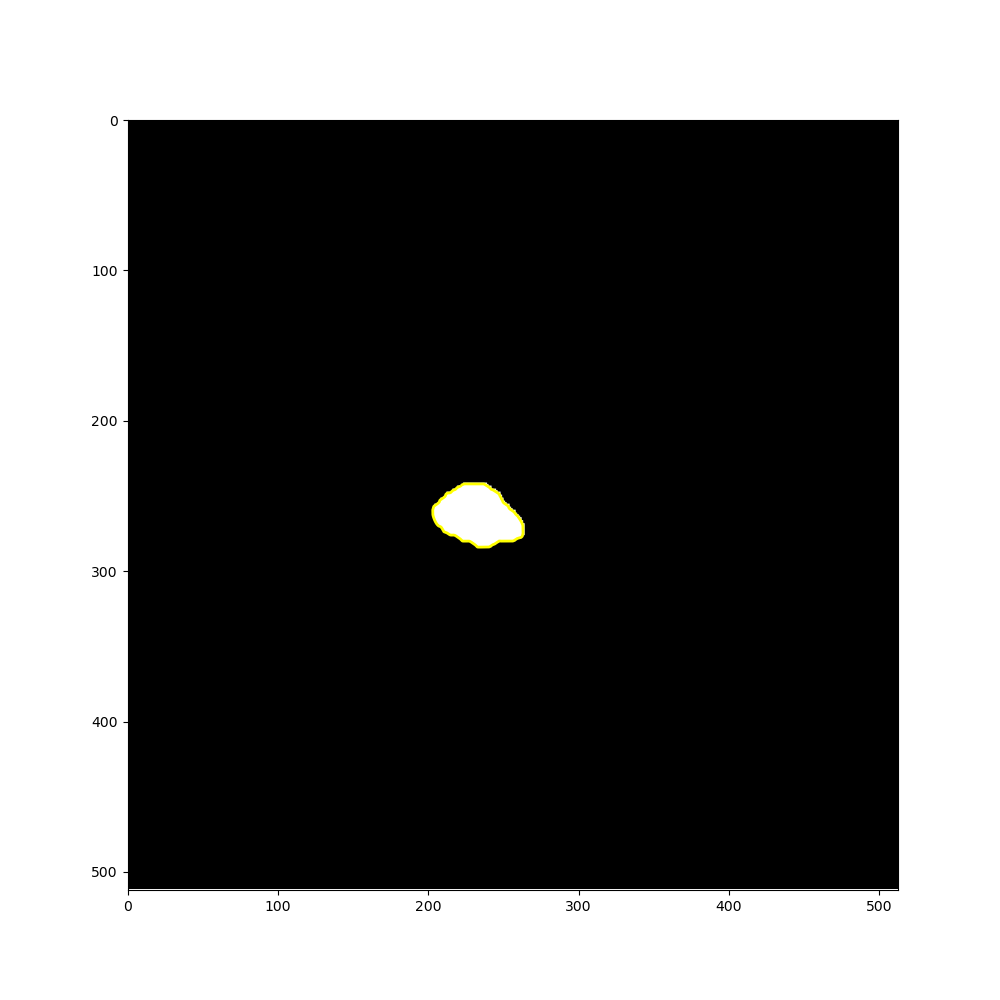

(0.0, 512.0, 512.0, 0.0)

In [5]:



for frame_index in np.arange(0, 100, 1):
    
    #print(frame_index)
    
    

    frames.append(frame_index)

    cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_index )


   

    cine_image = img_as_float(cine_image)

    cine_original = cine_image



    #############  Add border Mask

    border_width = 64

    mask = np.zeros( cine_image.shape[0:2])


    for i in range(0,cine_image.shape[0]):

        for j in range(0,cine_image.shape[1]):

            if (i > border_width) & (i < (cine_image.shape[0]-border_width)) & (j > border_width) & (j < (cine_image.shape[1]-border_width)):

                mask[i,j] = True

            else:

                mask[i,j] = False




    for i in [0,1,2]:


        cine_image[:,:,i] = cine_image[:,:,i]*mask




#     plt.figure(figsize = (8,8))

#     plt.imshow(cine_image)



############ Search for yellow pixels


    yellow_pixels = np.where(  ( abs(cine_image[:,:,0] - cine_image[:,:,1]) <= 0.2 * cine_image[:,:,0]) & (cine_image[:,:,0] >= 1.5*cine_image[:,:,2]) & (cine_image[:,:,0] >= 0.7))



    yellow_pixels_y =  [ yellow_pixels[0][i] for i in range(0, len(yellow_pixels[0]))] 

    frames_yellow_pixels_y.append( yellow_pixels_y )



    yellow_pixels_x= [ yellow_pixels[1][i] for i in range(0, len(yellow_pixels[1]))]

    frames_yellow_pixels_x.append( yellow_pixels_x )


    yellow_pixels_coords = [ [ yellow_pixels[1][i] , yellow_pixels[0][i]] for i in range(0, len(yellow_pixels[1]))]


    frames_yellow_pixels_coords.append( yellow_pixels_coords )





    number_of_yellow = len(yellow_pixels_coords)

    Number_of_yellows.append(number_of_yellow)





#     x_bar = sum(yellow_pixels_x)/len(yellow_pixels_x)

#     y_bar = sum(yellow_pixels_y)/len(yellow_pixels_y)


#     plt.figure(figsize = (8,8))
#     plt.scatter(yellow_pixels_x, yellow_pixels_y, marker = 'p', color = 'black')
#     plt.scatter(yellow_pixels_x[0], yellow_pixels_y[0])
#     plt.scatter(x_bar, y_bar, color = 'red')

#     #plt.xticks( ticks = np.arange(220,260,1))
#     plt.grid('on')

#     plt.gca().invert_yaxis()



#=====================================================================================


number_yellow_2_frame = dict( zip(Number_of_yellows, frames))

frame_2_yellow_pixels_x = dict( zip(frames , frames_yellow_pixels_x ))

frame_2_yellow_pixels_y = dict( zip(frames , frames_yellow_pixels_y ))

frame_2_yellow_pixels_coords = dict( zip(frames , frames_yellow_pixels_coords ))

Number_of_yellows_max = np.max(Number_of_yellows)


Max_yellow_frame = number_yellow_2_frame[Number_of_yellows_max]

print(Max_yellow_frame)

yellow_pixels_x = frame_2_yellow_pixels_x[Max_yellow_frame]

yellow_pixels_y = frame_2_yellow_pixels_y[Max_yellow_frame]

yellow_pixels_coords = frame_2_yellow_pixels_coords[Max_yellow_frame]




cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % Max_yellow_frame )


#==================================================================================================


def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n



#==================================================================================================



## Trying to implement nearest neighbour KD-tree

#plt.close('all')



coords = yellow_pixels_coords

#print(len(coords))


original_point = coords[0]

point = original_point

#print(start_point)

ordered_points = []

ordered_points.append(point)


for i in range(0 , len(coords) - 1 ):  # length - 1 since dealing with pairs of points
    
    
    if i > 0.5*len(yellow_pixels_coords):
        
        coords.append(original_point)  #if points have been missed, this basically stops them being counted at the end
    
    
    
    coords_array = np.array(coords)
    
    #print(coords_array.shape)
    
    point_indx = np.where( (coords_array[:,0] == point[0]) & (coords_array[:,1] == point[1] ))

    point_indx = list(point_indx)[0][0]
    
    
    kdt = scipy.spatial.KDTree(coords_array, leafsize=10, compact_nodes=True, copy_data=False, balanced_tree=True, boxsize=None)



    closest_points = kdt.query(point, 2)

    

    closest_point = coords[ closest_points[1][1]]
    
    
    coords.pop(point_indx)
    
    #print('s' + str(point))
    
    #print(len(coords))
    
    
    point = closest_point
    
    ordered_points.append(point)
    
    #print('c' + str(point))
    


    
ordered_points_array = np.array(ordered_points)






#==================================================================================================




ordered_x = ordered_points_array[:,0] 

ordered_y = ordered_points_array[:,1] 

# # plt.figure(figsize = (8,8))

# # plt.imshow(cine_image)

# # plt.plot(ordered_x, ordered_y, marker = 'p', 
# #          color = 'white')



# plt.scatter(ordered_x[0], ordered_y[0], color = 'lightblue')






for i in range(0,2):
    
    mov_avg_x = moving_average(ordered_x)
    
    mov_avg_y = moving_average(ordered_y)


mov_avg_points = [ [mov_avg_x[i], mov_avg_y[i]]  for i in range(0, len(mov_avg_x))]    

mov_avg_points = mov_avg_points + [mov_avg_points[0]]

    
#mov_avg_points = [1/2*(ordered_points[0] + ordered_points[-1])] + mov_avg_points #+ #[ordered_points[0]]

#mov_avg_points = [ [0.5* ( mov_avg_x[0] + mov_avg_y[0] ), 0.5* ( mov_avg_x[-1] + mov_avg_y[-1] ) ]] + [ [mov_avg_x[i], mov_avg_y[i]]  for i in range(0, len(mov_avg_x))] + [ordered_points[0]]

#mov_avg_points.append( ordered_points_array[0] )

#mov_avg_points.append()
    
mov_avg_array = np.array(mov_avg_points)



#==================================================================================================



plt.figure(figsize = (8,8))

plt.imshow(cine_image)

plt.plot(mov_avg_array[:,0], mov_avg_array[:,1], marker = 'p', color = 'white')



plt.scatter(yellow_pixels[1], yellow_pixels[0], color = 'lightblue')

plt.scatter(ordered_x[0], ordered_y[0])

plt.scatter(ordered_x[1], ordered_y[1])

plt.grid('on')

#plt.gca().invert_yaxis()



#==================================================================================================




from scipy.interpolate import interp1d

#x_0, y_0 = ordered_points_array.T

x_av, y_av = mov_avg_array.T

#x, y = ordered_points_array[0::2].T

i = np.arange(len(mov_avg_array[0::1]))

# 5x the original number of points
interp_i = np.linspace(0, i.max(), 4 * i.max())

xi = interp1d(i, x_av, kind='cubic')(interp_i)
yi = interp1d(i, y_av, kind='cubic')(interp_i)

fig  = plt.figure(figsize = (10,10))

ax = fig.add_subplot()

ax.imshow(cine_original)
ax.plot(xi, yi, color = 'white', marker = '.')
#ax.plot(x_0, y_0, 'ko')
plt.show()




#==================================================================================================





import matplotlib.path as mpltPath

interpolated_contour_points = [ [xi[j] , yi[j]] for j in range(0, len(xi)) ]

path = mpltPath.Path(interpolated_contour_points)



import matplotlib.patches as patches

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111)


ax.set_xlim(0, 512)
ax.set_ylim(0,512)


ax.invert_yaxis()

plt.axis('on')

ax.imshow( cine_image)

patch = patches.PathPatch(path, facecolor='None', edgecolor = 'yellow', lw=2)

ax.add_patch(patch)





#==================================================================================================




### Create a pixel mask of points in his contour

contour_mask1 = np.zeros(cine_original[:,:,0].shape)


#############

contour_mask2 = np.zeros(cine_original[:,:,0].shape)

########

#print(cine_original.shape)


cont_x_min = int(np.floor(min(xi)))

#print(cont_x_min)

cont_x_max = int(np.ceil(max(xi)))

cont_y_min = int(np.floor(min(yi)))

cont_y_max = int(np.ceil(max(yi)))


for x in range(cont_x_min - 1 , cont_x_max+1):
    
    for y in range(cont_y_min - 1 , cont_y_max+1):
        
        point = [[x,y]]
        
        inside_point1 = path.contains_points(point, radius = 1)
        
        inside_point2 = path.contains_points(point, radius = -1)
        
        contour_mask1[y,x] = 1*inside_point1[0]
        
        contour_mask2[y,x] = 1*inside_point2[0]
        
        
if np.sum(contour_mask1) > np.sum(contour_mask2):
    
    contour_mask = contour_mask1
        
else: 
    
    contour_mask = contour_mask2
    
        
#print(contour_mask.shape)


boundary_array = contour_mask



boundary_pixels = np.where( contour_mask == 1)        


boundary_pixel_coordinates =  np.array([   [ boundary_pixels[1][i]  ,  boundary_pixels[0][i] ] for i in range(0 , len(boundary_pixels[0]))  ] )


Inside_Boundary_Pixel_Coordinates = boundary_pixel_coordinates


with open('Cine Pickles/' + cine_video_name + '/Inside_Boundary_Pixel_Coordinates.pickle', 'wb') as handle:
    
    pickle.dump(Inside_Boundary_Pixel_Coordinates, handle, protocol=pickle.HIGHEST_PROTOCOL)



#==================================================================================================





fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(111)


ax.set_xlim(0, 512)
ax.set_ylim(0,512)



plt.imshow(contour_mask , cmap = 'gray')#*cine_original[:,:,0]
           #, )#cmap = 'jet')
    
plt.gca().invert_yaxis()
    
patch = patches.PathPatch(path, facecolor='None', edgecolor = 'yellow', lw=2)

ax.add_patch(patch)

#plt.gca().invert_yaxis()

plt.axis('on')


In [6]:

All_Frames_Target_Pixel_Coordinates = []


for minute_number  in np.arange(1, number_of_minutes +2 , 2 , dtype = 'int'):
    
    #print(minute_number)


    with open('Cine Pickles/' + cine_video_name + '/minute ' + str(minute_number) +'/Frames_Target_Pixel_Coordinates.pickle', 'rb') as handle:
        Frames_Target_Pixel_Coordinates = pickle.load(handle)
     
    
    for frame in Frames_Target_Pixel_Coordinates:
    
    
        All_Frames_Target_Pixel_Coordinates.append(frame)
        
        
#print(All_Frames_Target_Pixel_Coordinates)

In [7]:
Areas = []

Fracs_outside_calculated = []


for frame_num in frame_nums:
    
    
    
    
    
    
    target_array = np.zeros(cine_image.shape[0:2])
    

    for coordinate in All_Frames_Target_Pixel_Coordinates[frame_num]:

        x = coordinate[0]

        y = coordinate[1]

        target_array[y,x] = 1



    outside_pixels = np.where(  (2*target_array - contour_mask) == 2)
    
    area_outside = len(outside_pixels[0])
    
    area = len(All_Frames_Target_Pixel_Coordinates[frame_num])
    
    frac_outside = 100*area_outside/area
    
    
    Fracs_outside_calculated.append(frac_outside)
    
    Areas.append(area)



    
    

#     total_in = 0

#     total = 0

#     for coordinate in All_Frames_Target_Pixel_Coordinates[frame_num]:

#         for boundary_coordinate in Inside_Boundary_Pixel_Coordinates:

#             inside_test = (coordinate[0] == boundary_coordinate[0]) & (coordinate[1] == boundary_coordinate[1])

#             total_in += inside_test

#         total += 1

#         #total_in += inside_test



#     Areas.append(total)

#     Fracs_outside.append(1 - total_in/total)

<IPython.core.display.Javascript object>


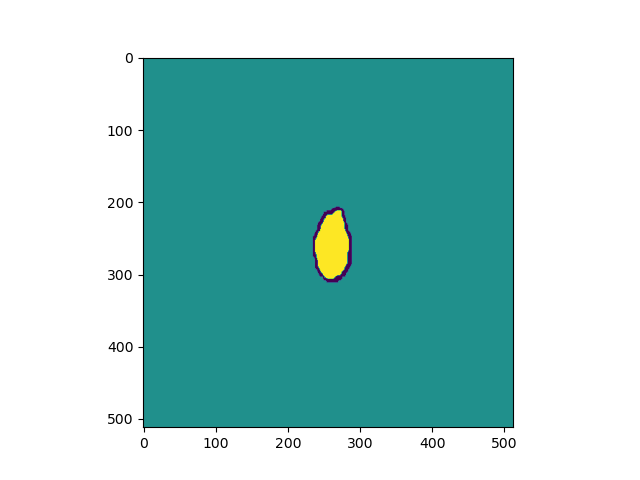

In [12]:
plt.figure()

plt.imshow(2*target_array - contour_mask)

<IPython.core.display.Javascript object>


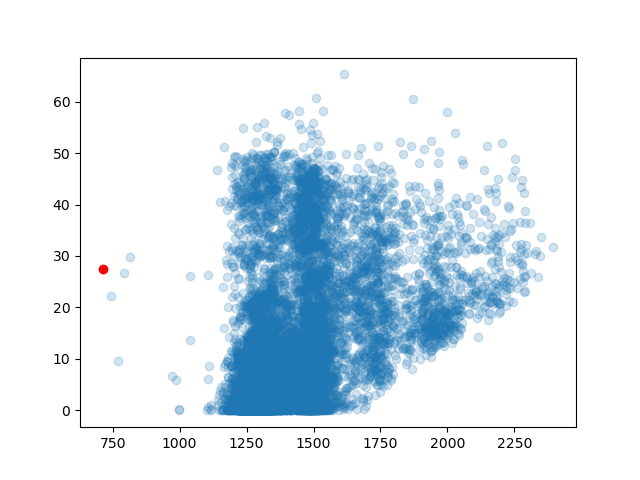

In [8]:
plt.figure()

plt.scatter(Areas, Fracs_outside_calculated , alpha = 0.2)


frame_num = 1


plt.scatter(Areas[frame_num], Fracs_outside_calculated[frame_num] , color = 'r')



In [9]:
# print(1 - total_in/total)

# print(total_in)

<IPython.core.display.Javascript object>


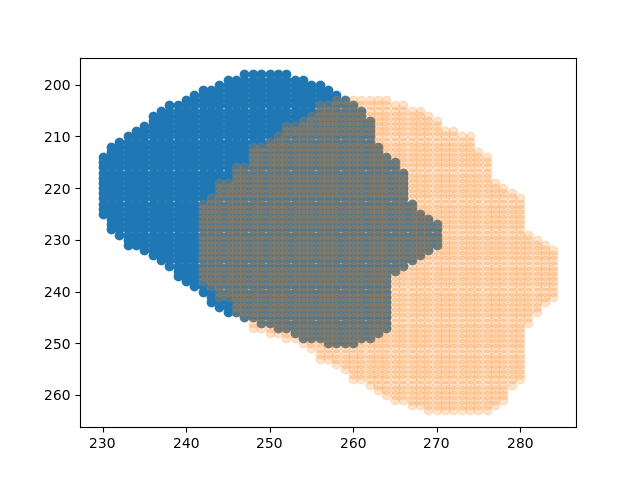

In [10]:
frame_num = 19

plt.figure()

plt.scatter(  All_Frames_Target_Pixel_Coordinates[frame_num][:,1] , All_Frames_Target_Pixel_Coordinates[frame_num][:,0])

plt.scatter(  Inside_Boundary_Pixel_Coordinates[:,1] , Inside_Boundary_Pixel_Coordinates[:,0], alpha = 0.2)

plt.gca().invert_yaxis()

<IPython.core.display.Javascript object>


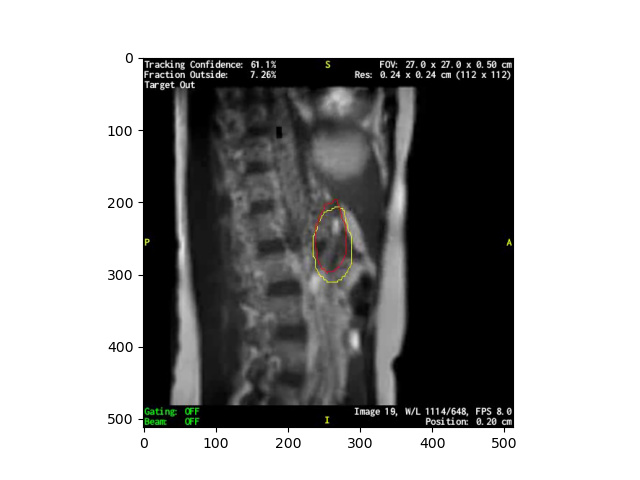

In [18]:
cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_num )

plt.figure()

plt.imshow(cine_image)






#### Reading Fraction Outside


In [19]:
# import numpy as np
# import matplotlib

# import matplotlib.pyplot as plt
# %matplotlib notebook

# import pickle

# import skimage

# from skimage.util import img_as_float

# from skimage.metrics import structural_similarity as ssim

<IPython.core.display.Javascript object>


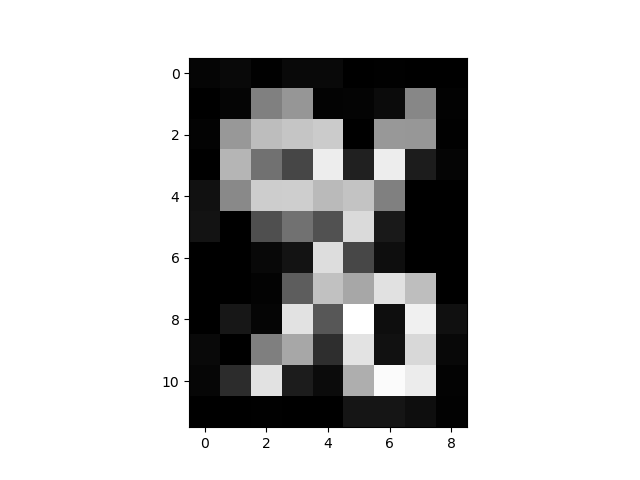

In [20]:
### Reference numbers

refs = [0,0,0,0,0,0,0,0,0,0,0,0]


# for 0

cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 82 )

ref_0 = cine_image[4:16, 156:164][:,:,0]

refs[0] = ref_0


# for 1

cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 23 )

ref_1 = cine_image[4:16, 156:164][:,:,0]

refs[1] = ref_1


# for 2


cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 424 )

ref_2 = cine_image[4:16, 156:164][:,:,0]

refs[2] = ref_2


# for 3



cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 1531 )

ref_3 = cine_image[4:16, 156:164][:,:,0]

refs[3] = ref_3



#for 4


cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 1060 )

ref_4 = cine_image[4:16, 156:164][:,:,0]

refs[4] = ref_4


# for 5


cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 18 )

ref_5 = cine_image[4:16, 149:157][:,:,0]

refs[5] = ref_5




# for 6

cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 23 )

ref_6 = cine_image[4:16, 149:157][:,:,0]

refs[6] = ref_6


# for 7

cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 143 )

ref_7 = cine_image[4:16, 156:164][:,:,0]

refs[7] = ref_7


# for 8



cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 19 )

ref_8 = cine_image[4:16, 156:164][:,:,0]

refs[8] = ref_8



# for 9



cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 18 )

ref_9 = cine_image[4:16, 156:164][:,:,0]

refs[9] = ref_9




cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 333 )

ref_point = cine_image[18:30 , 155:163 , 0]

refs[10] = ref_point



cine_image = plt.imread('Cine frames/' + 'test02_cine_frac01.ogv' + '/frame-%04d.png' % 2632 )

ref_percent = cine_image[18:30 , 183:192 ,0]

refs[11] = ref_percent








plt.figure()

plt.imshow(refs[11], cmap = 'gray')

In [21]:
# from skimage.util import img_as_float

# from skimage.metrics import structural_similarity as ssim


Fracs_outside_from_image = []


for frame_num in frame_nums:

    cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_num )



    ### Percent sign depending on number of digits


    ## 4 digit case

    percent_4 = cine_image[18:30 , 183:192 ,0]


    ## 3 digit case


    percent_3 = cine_image[18:30 , 176:185 ,0]


    ################# Test which one matches reference percent best


    ssim_4 = ssim(percent_4 , refs[11])

    ssim_3 = ssim(percent_3 , refs[11])


    if ssim_4 > ssim_3:

        number_of_digits = 4

    else:

        number_of_digits = 3


    #print(number_of_digits)




    ################# Case of three digits


    if number_of_digits == 3:


        first_digit_img = cine_image[18:30 , 149:157,0]


        first_digit_tests = []


        for number in range(0,10):

            ref_num = refs[number]

            first_digit_tests.append( ssim( first_digit_img, (ref_num) ))


        first_digit =  np.where(  np.array(first_digit_tests) ==  max(first_digit_tests) )[0][0]


        fraction_outside = first_digit
        
        Fracs_outside_from_image.append(fraction_outside)

    ############################# Case of 4 digits


    if number_of_digits == 4:

        first_digit_img = cine_image[18:30 , 149:157,0]


        first_digit_tests = []


        for number in range(0,10):

            ref_num = refs[number]

            first_digit_tests.append( ssim( first_digit_img, (ref_num) ))


        first_digit =  np.where(  np.array(first_digit_tests) ==  max(first_digit_tests) )[0][0]



        second_digit_img = cine_image[18:30 , 156:164,0]


    #     plt.figure()

    #     plt.imshow(second_digit_img)



        second_digit_tests = []


        for number in range(0,10):

            ref_num = refs[number]

            second_digit_tests.append( ssim( second_digit_img, (ref_num) ))


        second_digit =  np.where(  np.array(second_digit_tests) ==  max(second_digit_tests) )[0][0]


        fraction_outside = 10*first_digit + second_digit
        
        Fracs_outside_from_image.append(fraction_outside)



    #print(fraction_outside)


    # print(first_digit)


    # plt.figure()

    # plt.imshow(second_digit_img)



# plt.figure()

# plt.imshow(cine_image)


# plt.figure()

# plt.imshow(refs[1])

<IPython.core.display.Javascript object>


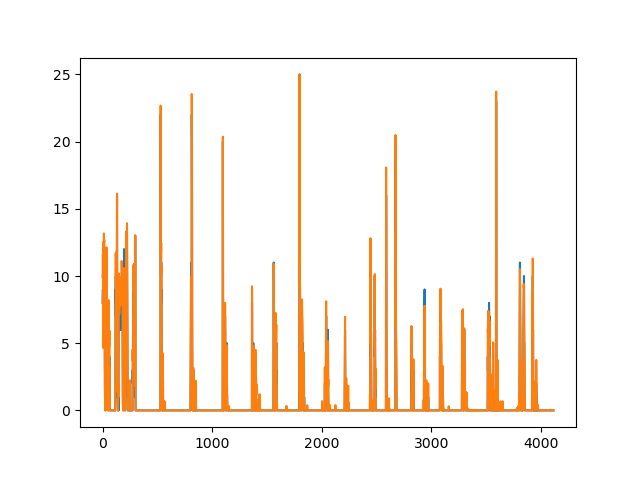

<IPython.core.display.Javascript object>


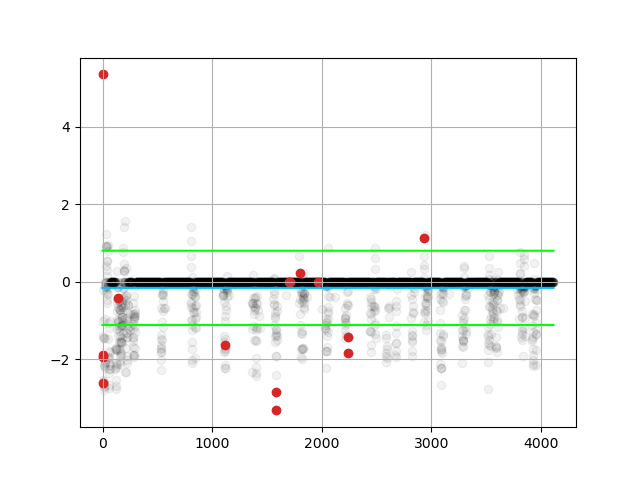

agreement 2 stds: 0.96%


In [28]:
plt.figure()

plt.plot(frame_nums , Fracs_outside_from_image)


plt.plot(frame_nums , Fracs_outside_calculated)




Fracs_outside_differences =  np.array(Fracs_outside_from_image) - np.array(Fracs_outside_calculated) 


Fracs_outside_abs_differences = abs(Fracs_outside_differences)


Fracs_outside_differences_mean = np.mean(Fracs_outside_differences)

Fracs_outside_differences_std = np.std(Fracs_outside_differences)

#print(Fracs_outside_differences_std)



Areas_mean = np.mean(Areas)

Areas_std = np.std(Areas)



# errors = np.where( ( Fracs_outside_abs_differences  > max( [5*Fracs_outside_differences_std , 7] ) ) | ( (Areas - Areas_mean) < -2.5*Areas_std)   )     
# print(errors)

with open('Cine Pickles/' + cine_video_name + '/error_frames.pickle', 'rb') as handle:
    error_frames = pickle.load(handle)




plt.figure()

plt.grid()

plt.scatter(frame_nums , Fracs_outside_differences  , color = 'black' , alpha = 0.05 )

plt.scatter( error_frames ,  [ Fracs_outside_differences[error_frame] for error_frame in error_frames  ] , color = 'tab:red')

plt.plot( frame_nums , [Fracs_outside_differences_mean for frame in frame_nums] , color = 'deepskyblue')


plt.plot( frame_nums , [Fracs_outside_differences_mean + 2*Fracs_outside_differences_std for frame in frame_nums] , color = 'lime')

plt.plot( frame_nums , [Fracs_outside_differences_mean - 2*Fracs_outside_differences_std for frame in frame_nums] , color = 'lime')


agreement_std = 2*Fracs_outside_differences_std

print('agreement 2 stds: ' + str(round(agreement_std, 2)) + '%')


with open('Cine Pickles/' + cine_video_name + '/agreement_with_fraction_outside_2_std.pickle', 'wb') as handle:
    pickle.dump(agreement_std, handle, protocol=pickle.HIGHEST_PROTOCOL)


# plt.figure()


# plt.scatter(frame_nums , Areas , color = 'black' , alpha = 0.05)

# plt.scatter( errors[0] , [Areas[error_frame] for error_frame in errors[0]] , color =  'tab:red' )

# plt.plot( frame_nums , [Areas_mean for frame in frame_nums] , color = 'deepskyblue')


# plt.plot( frame_nums , [Areas_mean - 3*Areas_std for frame in frame_nums] , color = 'lime')

In [861]:
Areas[83]

3088

<IPython.core.display.Javascript object>


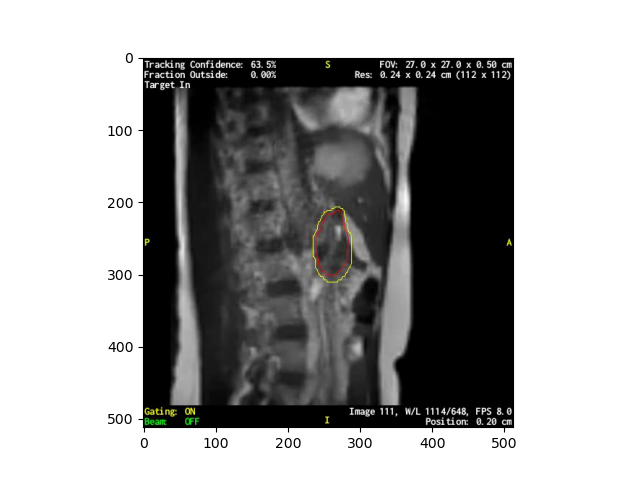

<IPython.core.display.Javascript object>


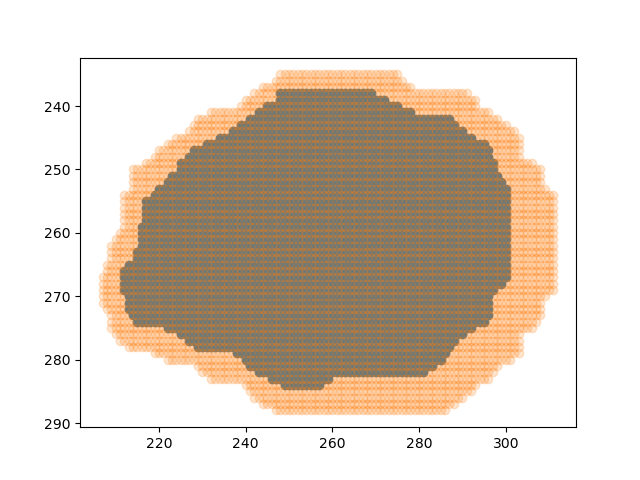

0
0.0


In [863]:
frame_num = 111

cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_num )


plt.figure()

plt.imshow(cine_image)





plt.figure()

plt.scatter(  All_Frames_Target_Pixel_Coordinates[frame_num][:,1] , All_Frames_Target_Pixel_Coordinates[frame_num][:,0])

plt.scatter(  Inside_Boundary_Pixel_Coordinates[:,1] , Inside_Boundary_Pixel_Coordinates[:,0], alpha = 0.2)

plt.gca().invert_yaxis()



print(Fracs_outside_from_image[frame_num])

print(Fracs_outside_calculated[frame_num])

In [864]:
############ Defining a perimeter
frames_areas = []

frames_perimeter_lengths = []

frames_perimeter_coordinates = []


for frame_num in frame_nums:
    
    if frame_num % 100 == 0:
        
        print(frame_num)


    target_array = np.zeros(cine_image.shape[0:2])

    perimeter_length = 0

    perimeter_coordinates = []

    area = 0


    for coordinate in All_Frames_Target_Pixel_Coordinates[frame_num]:

        x = coordinate[0]

        y = coordinate[1]

        target_array[y,x] = 1

        area += 1


    for coordinate in All_Frames_Target_Pixel_Coordinates[frame_num]:    


        neighbour_pixels_sum = np.sum( target_array[ coordinate[1] - 1 : coordinate[1] + 2     ,    coordinate[0] - 1  : coordinate[0] + 2])

        if (neighbour_pixels_sum != 9):

            perimeter_length += 1

            perimeter_coordinates.append(coordinate)


    perimeter_coordinates = np.array(perimeter_coordinates)
    
    frames_perimeter_coordinates.append(perimeter_coordinates)
    
    
    frames_areas.append(area)
    
    
    frames_perimeter_lengths.append(perimeter_length)
    
    

    
    
frames_areas = np.array(frames_areas)

frames_perimeter_lengths = np.array(frames_perimeter_lengths)



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100


(array([   0,    3,    4,    5,  138, 1114, 1582, 1583, 1698, 1707, 1799,
       1963, 2241, 2242, 2936], dtype=int64),)


<IPython.core.display.Javascript object>


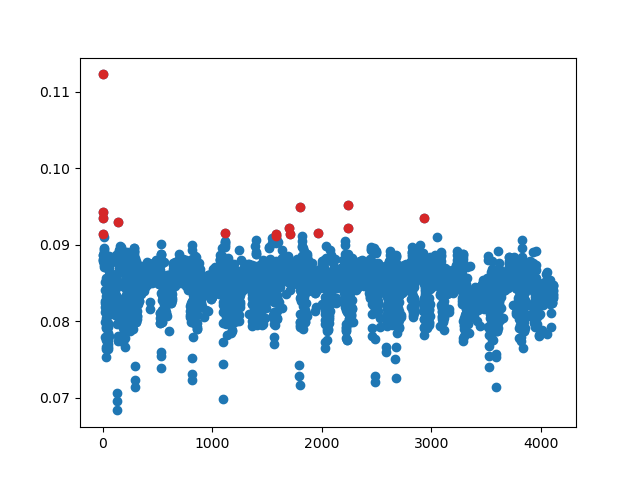

<IPython.core.display.Javascript object>


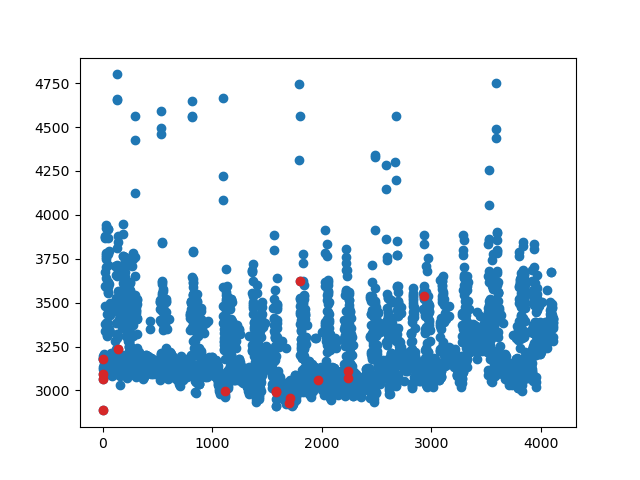

<IPython.core.display.Javascript object>


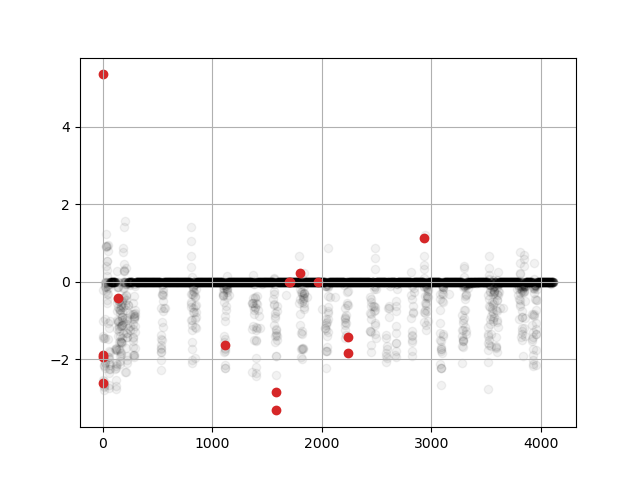

In [876]:
# plt.figure()

# plt.imshow(target_array)

# plt.scatter(perimeter_coordinates[:,0], perimeter_coordinates[:,1])

frames_ratios = frames_perimeter_lengths/frames_areas



ratio_mean = np.mean(frames_ratios)

ratio_std = np.std(frames_ratios)



errors = np.where( (frames_ratios - ratio_mean) > 2.5*ratio_std )


print(errors)


plt.figure()

plt.scatter(frame_nums, frames_ratios)


plt.scatter(  errors[0] , [frames_ratios[error_frame] for error_frame in errors[0]] , color =  'tab:red' )








plt.figure()

plt.scatter(frame_nums, frames_areas)


plt.scatter(  errors[0] , [frames_areas[error_frame] for error_frame in errors[0]] , color =  'tab:red' )









plt.figure()

plt.grid()

plt.scatter(frame_nums , Fracs_outside_differences  , color = 'black' , alpha = 0.05 )

plt.scatter( errors[0] ,  [ Fracs_outside_differences[error_frame] for error_frame in errors[0]  ] , color = 'tab:red')

#plt.plot( frame_nums , [Fracs_outside_differences_mean for frame in frame_nums] , color = 'deepskyblue')




<IPython.core.display.Javascript object>


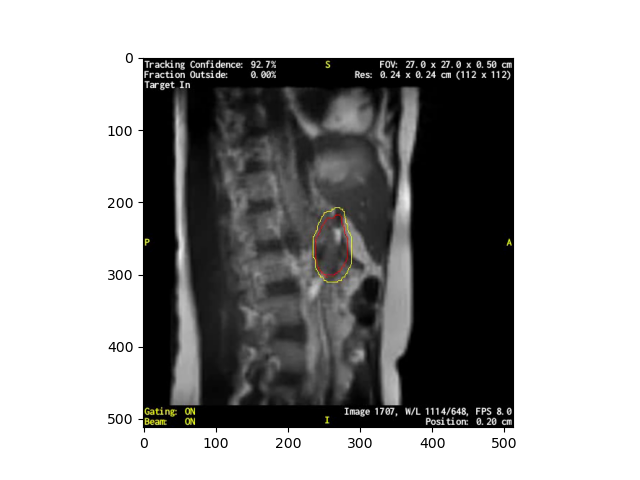

<IPython.core.display.Javascript object>


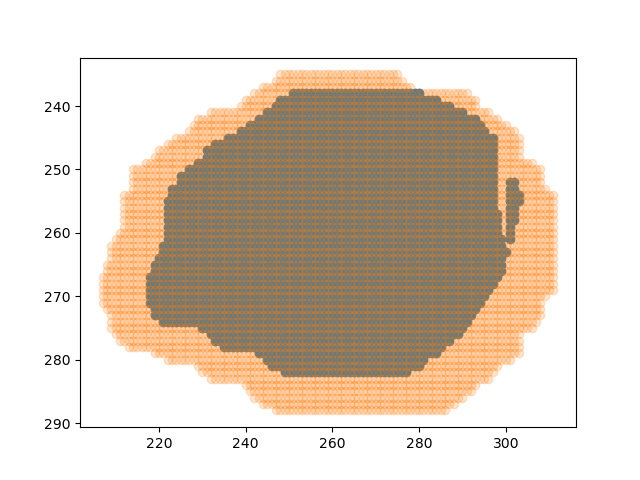

0
0.0


In [880]:
frame_num = 1707

cine_image = plt.imread('Cine frames/' + cine_video_name + '/frame-%04d.png' % frame_num )


plt.figure()

plt.imshow(cine_image)





plt.figure()

plt.scatter(  All_Frames_Target_Pixel_Coordinates[frame_num][:,1] , All_Frames_Target_Pixel_Coordinates[frame_num][:,0])

plt.scatter(  Inside_Boundary_Pixel_Coordinates[:,1] , Inside_Boundary_Pixel_Coordinates[:,0], alpha = 0.2)

plt.gca().invert_yaxis()



print(Fracs_outside_from_image[frame_num])

print(Fracs_outside_calculated[frame_num])